# **종합실습1 이변량분석(y-숫자) : car seat 매출 분석**

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

## **1.환경준비**

### **(1) 라이브러리 로딩**

In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

### **(2) 데이터 로딩**

|	변수명	|	설명	|	구분	|
|----|----|----|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Income 	|	 지역 주민 평균 소득	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|



In [28]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


In [30]:
target = 'Sales'

## **2.숫자형 X --> Y**

* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

### **(1) Advertising -> Sales**

1) 시각화 : scatter(regplot), jointplot

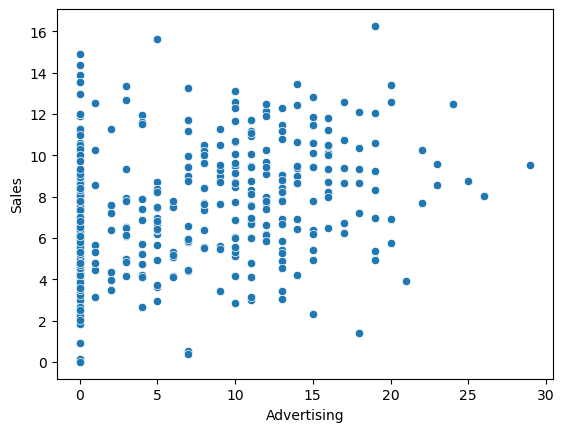

In [22]:
var = 'Advertising'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

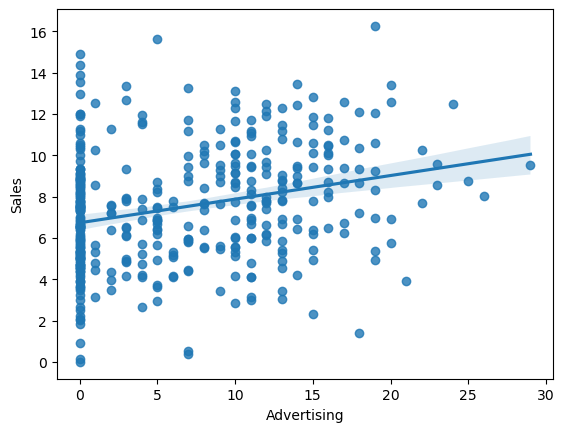

In [24]:
sns.regplot(x=var, y = target, data = data)
plt.show()

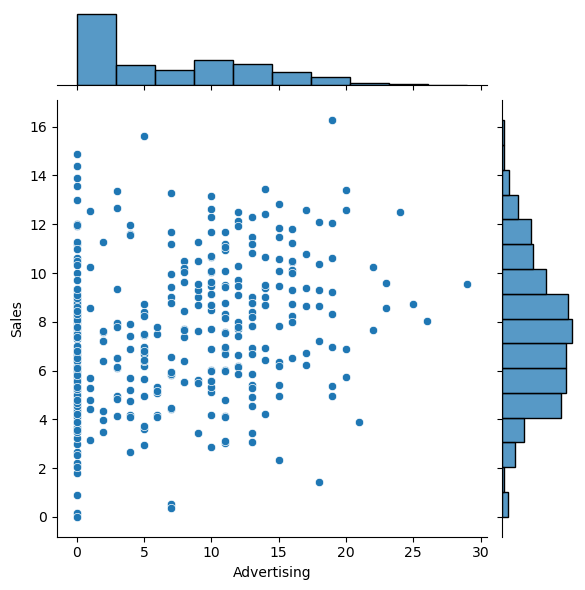

In [26]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [28]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.269506781376902, p-value : 4.3776771103027514e-08


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 광고비와 판매량은 관련이 있다. 그러나 크지 않다.

* 추가 : 광고비 0 빼고 분석해보기

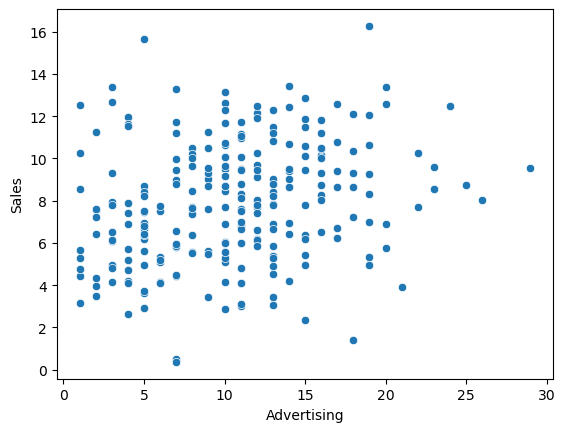

In [30]:
temp = data.loc[data['Advertising'] > 0]
sns.scatterplot(x=var, y = target, data = temp)
plt.show()

In [32]:
result = spst.pearsonr(temp[var], temp[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.2571829256169392, p-value : 3.112672883086058e-05


In [16]:
def visualize(x, y, data):
    sns.regplot(x = x, y = y, data = data)
    sns.jointplot(x = x, y = y, data = data)

    plt.show()

### **(2) Population -> Sales**

1) 시각화 : scatter(regplot), jointplot

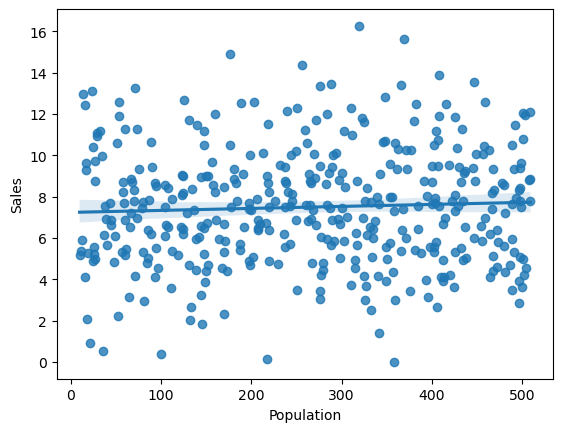

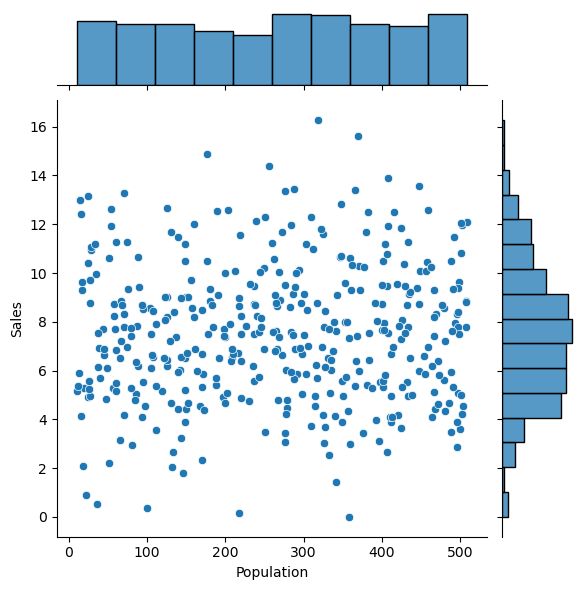

In [64]:
visualize('Population', 'Sales', data)

2) 수치화 : 상관분석

In [67]:
spst.pearsonr(data['Population'], data['Sales'])

PearsonRResult(statistic=0.0504709844720392, pvalue=0.31398160931904856)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### **(3) Price -> Sales**

1) 시각화 : scatter(regplot), jointplot

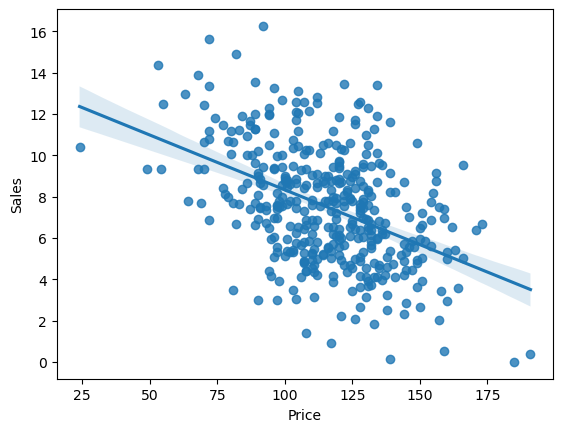

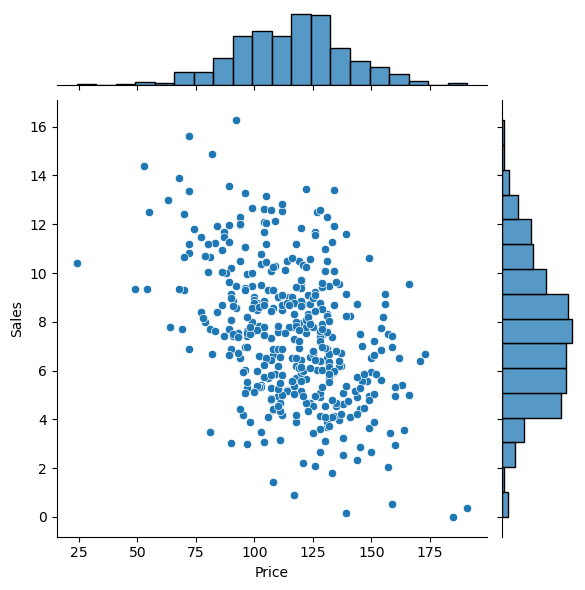

In [69]:
visualize('Price', 'Sales', data)

2) 수치화 : 상관분석

In [74]:
spst.pearsonr(data['Price'], data['Sales'])

PearsonRResult(statistic=-0.4449507278465726, pvalue=7.618187011913169e-21)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### **(4) Age -> Sales**

1) 시각화 : scatter(regplot), jointplot

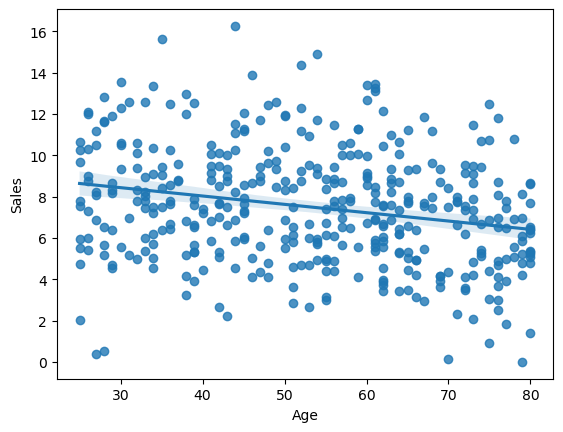

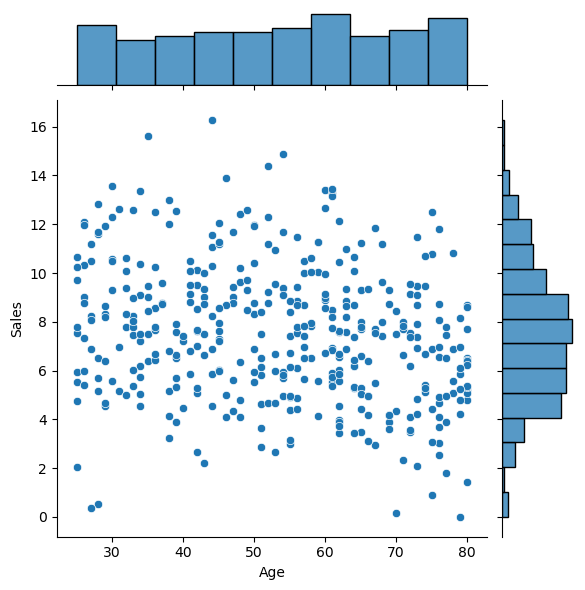

In [83]:
visualize('Age', 'Sales', data)

2) 수치화 : 상관분석

In [87]:
spst.pearsonr(data['Age'], data['Sales'])

PearsonRResult(statistic=-0.2318154396045765, pvalue=2.7889498393714038e-06)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [ ]:
시각화 결과를 통해서는 큰 상관관계를 확인하기 어려웠습니다. 나이대의 분포가 고르다는 것을 볼 수 있었습니다.

수치화 결과를 통해서는 -0.5보다 크고 -0.2보다 약간 작은 상관계수를 통해 중약 정도의 음의 상관관계를 갖고 있다고 해석할 수 있습니다.

### **(5) CompPrice -> Sales**

1) 시각화 : scatter(regplot), jointplot

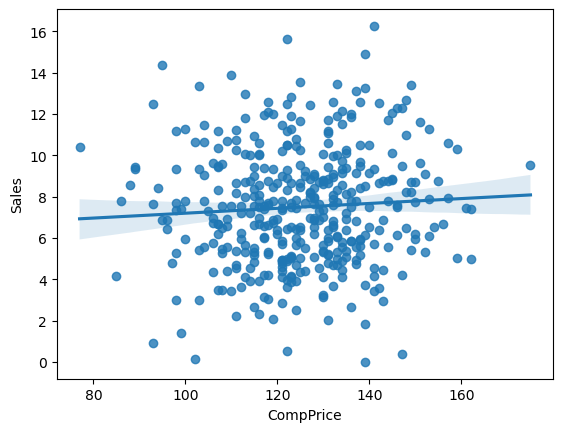

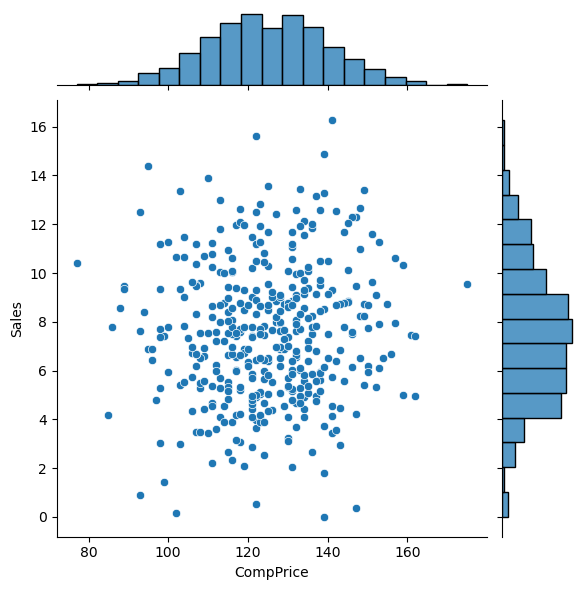

In [89]:
visualize('CompPrice', 'Sales', data)

2) 수치화 : 상관분석

In [91]:
spst.pearsonr(data['CompPrice'], data['Sales'])

PearsonRResult(statistic=0.06407872955062152, pvalue=0.2009398289418404)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

시각화 결과를 통해 전체적으로 중앙에 데이터가 몰려있음을 확인할 수 있었습니다. 지역별 경쟁사의 판매 가격이 중앙인 110-130에 몰려있는 것을 참고하여 자사 제품의 가격을 설정할 수 있습니다.

수치화 결과를 통해서는 상관계수가 0.1보다 작으므로 두 변수간의 상관관계를 거의 없음을 알 수 있습니다.

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US,Price_Diff
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes,18
1,11.22,111,48,16,260,83,Good,65,Yes,Yes,28
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes,33
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes,20
4,4.15,141,64,3,340,128,Bad,38,Yes,No,13
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,Yes,Yes,10
396,6.14,139,23,3,37,120,Medium,55,No,Yes,19
397,7.41,162,26,12,368,159,Medium,40,Yes,Yes,3
398,5.94,100,79,7,284,95,Bad,50,Yes,Yes,5


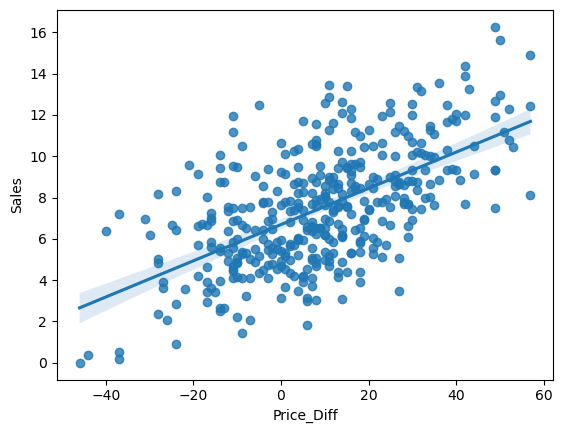

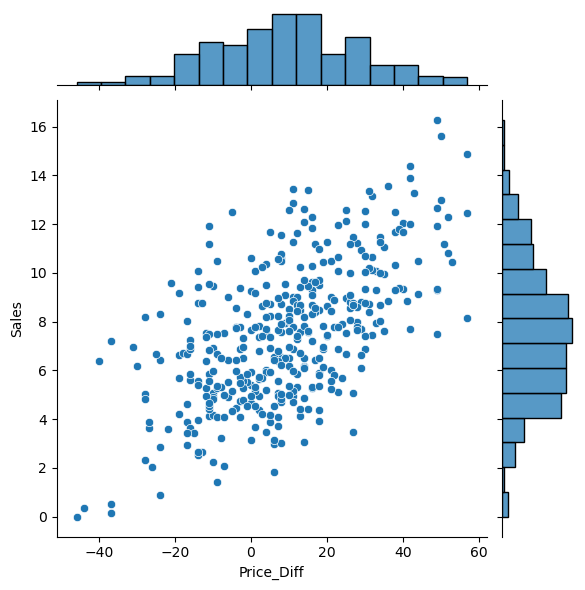

PearsonRResult(statistic=0.5979217124533921, pvalue=3.877120641788767e-40)

In [20]:
# 가격 차이 = 가격 경쟁력
data['Price_Diff'] = data['CompPrice'] - data['Price']
display(data)

# 분석
var = 'Price_Diff'
visualize(var, 'Sales', data)
spst.pearsonr(data['Price_Diff'], data['Sales'])

### **(6) Income -> Sales**

1) 시각화 : scatter(regplot), jointplot

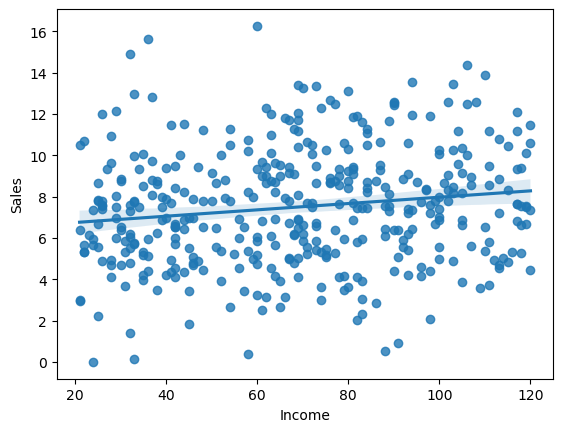

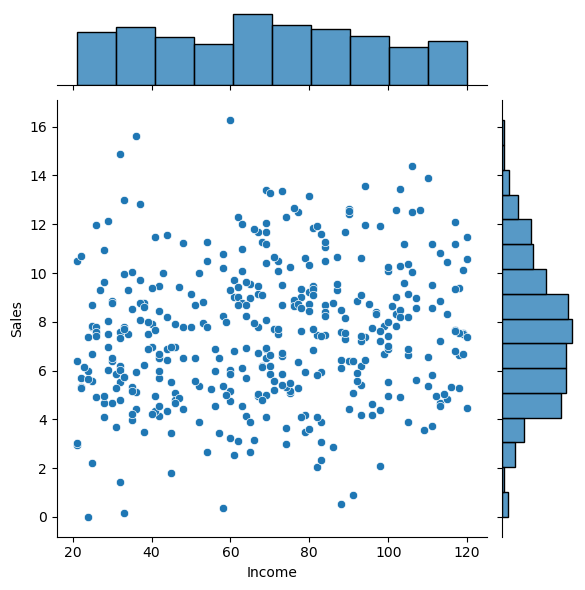

In [93]:
visualize('Income', 'Sales', data)

2) 수치화 : 상관분석

In [95]:
spst.pearsonr(data['Income'], data['Sales'])

PearsonRResult(statistic=0.15195097946754424, pvalue=0.0023096704539517904)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

시각화를 통해 지역 주민의 소득이 다소 고르게 분포되어있음을 알 수 있고, 두 변수간의 상관관계를 찾기는 어려웠습니다

수치화를 통해서도 0.1보다 크고 0.2보다 작은 상관계수로 보아 약한 상관계수를 갖고 있음을 알 수 있습니다.

## **3.범주형 X --> Y**

* 모든 범주형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

### **(1) ShelveLoc-> Sales**

1) 시각화 : 평균비교 barplot

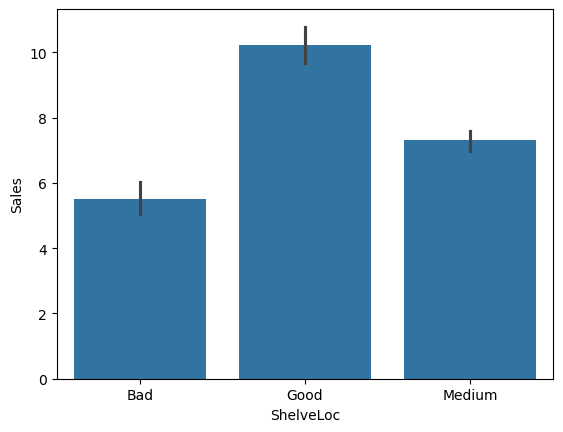

In [32]:
var = 'ShelveLoc'

sns.barplot(x=var, y=target, data = data)
plt.show()

2) 수치화 : t-test, anova

In [34]:
d_b = data.loc[data[var]=='Bad', target]
d_m = data.loc[data[var]=='Medium', target]
d_g = data.loc[data[var]=='Good', target]

spst.f_oneway(d_b, d_m, d_g)

F_onewayResult(statistic=92.22990509910348, pvalue=1.26693609015938e-33)

In [42]:
data[var].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [46]:
location = []

for i in data[var].unique():
    location.append(data.loc[data[var] == i, target])

spst.f_oneway(*location)

F_onewayResult(statistic=92.22990509910346, pvalue=1.26693609015938e-33)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### **(2) Urban -> Sales**

1) 시각화 : 평균비교 barplot

<Axes: xlabel='Urban', ylabel='Sales'>

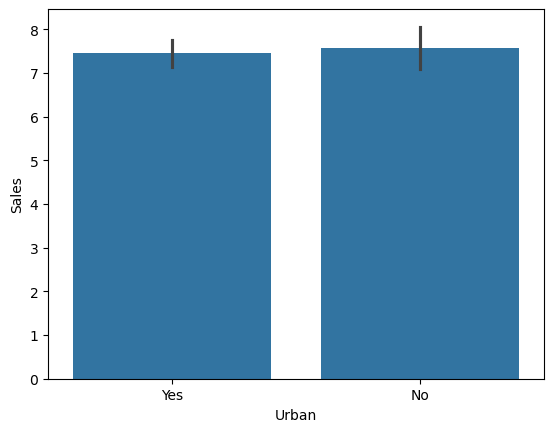

In [56]:
x = 'Urban'

sns.barplot(x = x, y = target, data = data)

2) 수치화 : t-test, anova

In [58]:
urban = data.loc[data[x] == 'Yes', target]
non_urban = data.loc[data[x] == 'No', target]

print(spst.ttest_ind(urban, non_urban))
print(spst.f_oneway(urban, non_urban))

TtestResult(statistic=-0.30765346670661126, pvalue=0.7585069603942775, df=398.0)
F_onewayResult(statistic=0.09465065557659712, pvalue=0.7585069603942085)


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### **(3) US-> Sales**

1) 시각화 : 평균비교 barplot

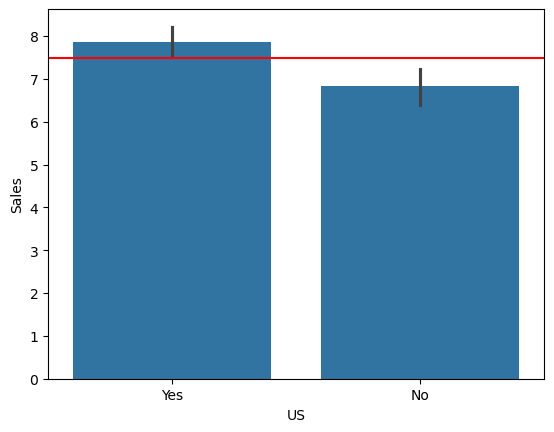

In [70]:
x = 'US'

sns.barplot(x = x, y = target, data = data)
plt.axhline(np.mean(data['Sales']), color = 'r')

2) 수치화 : t-test, anova

In [62]:
US = data.loc[data[x] == 'Yes', target]
non_US = data.loc[data[x] == 'No', target]

print(spst.ttest_ind(US, non_US))
print(spst.f_oneway(US, non_US))

TtestResult(statistic=3.589738747802499, pvalue=0.00037233958701471517, df=398.0)
F_onewayResult(statistic=12.886224277474618, pvalue=0.0003723395870148404)


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

## **4.관계 정리하기**

① 강한관계

② 중간관계

③ 관계없음